In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the .txt file
#scp osicmicrose@148.204.66.53:/home/osicmicrose/Desktop/EDA/SNN_IPN/sim_results/tb_4x4_modular.txt .
data = np.loadtxt('tb_4x4_modular.txt', skiprows=1)  # Adjust 'data.txt' to your filename

# Store each column into separate vectors
time = data[:, 0]
vin = data[:, 1]
Vr1 = data[:, 2]
iVread = data[:, 3]
hx = data[:, 4]
x = data[:, 5]
n = data[:, 6:10]
m = data[:, 10:14]
gap = data[:, 14:]

Text(0.5, 1.0, 'Memristance value')

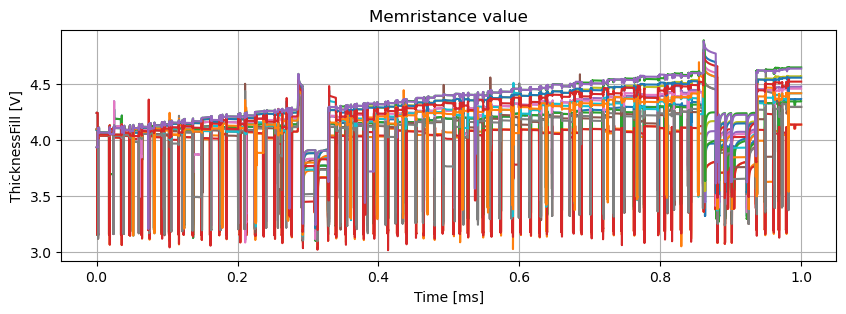

In [10]:
fig, ax = plt.subplots(1, figsize=(10,3))
for i in range(gap.shape[1]):
    ax.plot(time*1000, 5 - gap[:,i], label = f"Syn{i+1}")
# ax.legend()
ax.grid()
ax.set_xlabel("Time [ms]")
ax.set_ylabel("ThicknessFill [V]")
ax.set_title("Memristance value")

Text(0.5, 1.0, 'Input Layer Neural activity')

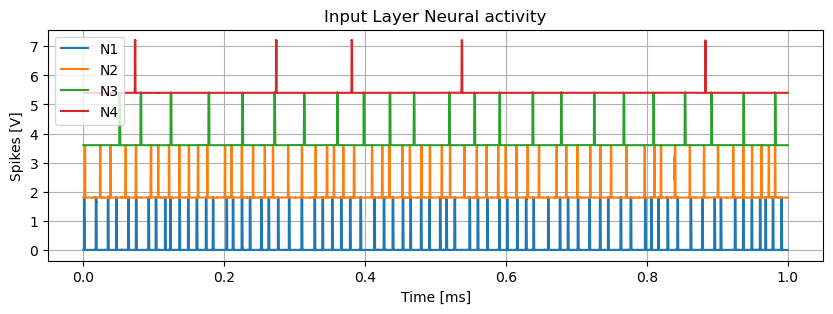

In [11]:
fig, ax = plt.subplots(1, figsize=(10,3))
for i in range(n.shape[1]):
    ax.plot(time*1000, n[:,i]+(1.8*i), label = f"N{i+1}")
ax.legend()
ax.grid()
ax.set_xlabel("Time [ms]")
ax.set_ylabel("Spikes [V]")
ax.set_title("Input Layer Neural activity")

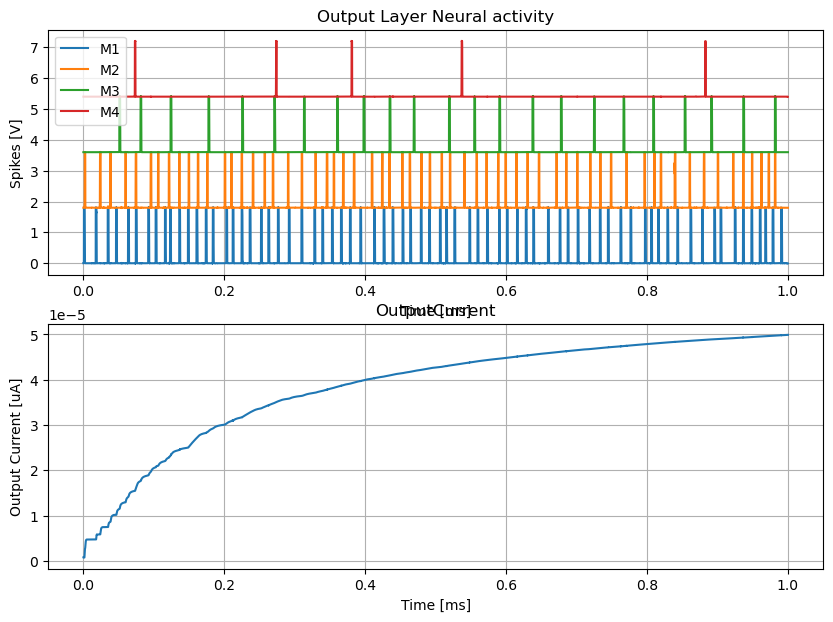

In [12]:
fig, ax = plt.subplots(2, figsize=(10,7))
for i in range(m.shape[1]):
    ax[0].plot(time*1000, n[:,i]+(1.8*i), label = f"M{i+1}")
ax[0].legend()
ax[0].grid()
ax[0].set_xlabel("Time [ms]")
ax[0].set_ylabel("Spikes [V]")
ax[0].set_title("Output Layer Neural activity")

ax[1].plot(time*1000, iVread, label = "Vin")

ax[1].set_xlabel("Time [ms]")
ax[1].set_ylabel("Output Current [uA]")
ax[1].set_title("OutputCurrent")
ax[1].grid()

Text(0.5, 1.0, 'Votlage signals')

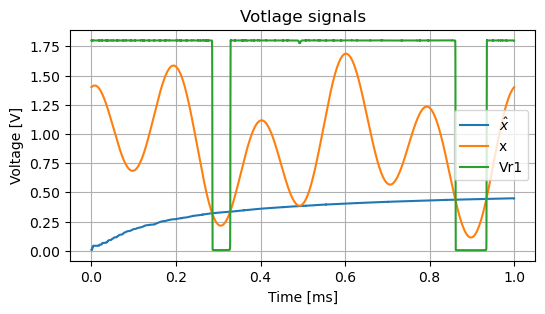

In [13]:
fig, ax = plt.subplots(1, figsize=(6,3))

ax.plot(time*1000, hx, label = "$\hat x$")
ax.plot(time*1000, x, label = "x")
ax.plot(time*1000, Vr1, label = "Vr1")
ax.legend()
ax.grid()
ax.set_xlabel("Time [ms]")
ax.set_ylabel("Voltage [V]")
ax.set_title("Votlage signals")

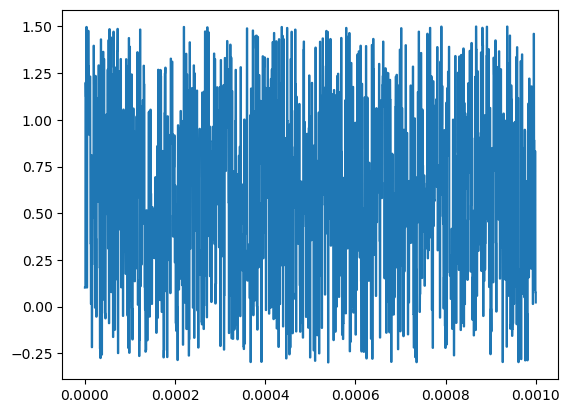

In [14]:
plt.plot(time, vin)